
# Project: TMDB movie Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction
### Project Overview
    In this project, we have to analyze the TMDB movie dataset and then communicate our findings about it. We will use the Python libraries NumPy, pandas, and Matplotlib to make the analysis easier
    the TMDB movie data set This data set contains information about 10,000 movies collected from the Movie Database (TMDb), including user ratings and revenue, Certain columns, like ‘cast’ and ‘genres’ and characters.
### Questions to be asked about the dataset:
    We are gonna ask some questions about this dataset like:
    Which genres are most popular?
    What kinds of properties are associated with movies that have high revenues?
    who is the most cast actor?
    what is the highest rated movie with the biggest budget?
    what is the lowest rated movie with the biggest budget?
    what are the overrated and underrated movies based on budget and popularity?
    what is the most month with movie releases?
    what are the years with highest number of releases? 
    what are the years with highest rated movies? 
    what's average runtime?
    what are the longest 10 movies and shortest 10 movies?

    


In [11]:
#import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import csv 
import seaborn as sns
from wordcloud import WordCloud



<a id='wrangling'></a>
## Data Wrangling
    check for cleanliness of data, delete unnecessary columns, check for NAN values and fix them, etc.


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#loading the csv file and storing it in the variable "df"
df = pd.read_csv('tmdb-movies.csv')

#printing first five rows to check the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




### Data Cleaning 
#### Based on my observations from the first 5 rows, and from previous datasets we need to do the following:
    1. The columns id, imdb_id, homepage, budget_adj, revenue adj are useless, hence, we need to delete them
    2. remove dublicates
    3. check for NAN values 
    4. replace null values with NAN 
    5. release_date needs to be formatted into standard date format 
    

### First we remove useless columns

In [3]:
  #After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#remove useless columns
df.drop(["id", "imdb_id", "homepage", "budget_adj", "revenue_adj"], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


### finding the dimensions of the dataframe after modification

In [4]:
df.shape

(10866, 16)

There are 10865 movie entries and 16 columns 

### finding data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   tagline               8042 non-null   object 
 7   keywords              9373 non-null   object 
 8   overview              10862 non-null  object 
 9   runtime               10866 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9836 non-null   object 
 12  release_date          10866 non-null  object 
 13  vote_count            10866 non-null  int64  
 14  vote_average          10866 non-null  float64
 15  release_year       

#### There are values missing in the following columns (director, cast, tagline, keywords, overview, genres, production companies)
      regarding the size of the data we can afford to delete rows where cast, director, genres, overview are missing since the missing values are small portions. However, we can't do the same for tagline, keywords, and production companies so we replace their missing values with NAN

#### deleting rows with null values:

In [6]:
df.dropna(axis = 0, inplace = True, subset = ['genres'])
df.dropna(axis = 0, inplace = True, subset = ['cast'])
df.dropna(axis = 0, inplace = True, subset = ['overview'])
df.dropna(axis = 0, inplace = True, subset = ['director'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10730 non-null  float64
 1   budget                10730 non-null  int64  
 2   revenue               10730 non-null  int64  
 3   original_title        10730 non-null  object 
 4   cast                  10730 non-null  object 
 5   director              10730 non-null  object 
 6   tagline               8002 non-null   object 
 7   keywords              9306 non-null   object 
 8   overview              10730 non-null  object 
 9   runtime               10730 non-null  int64  
 10  genres                10730 non-null  object 
 11  production_companies  9773 non-null   object 
 12  release_date          10730 non-null  object 
 13  vote_count            10730 non-null  int64  
 14  vote_average          10730 non-null  float64
 15  release_year       

#### In keywords and tagline and production companies, there are null values but I might not need these columns after all so I'll leave them as they are 

#### review dataset

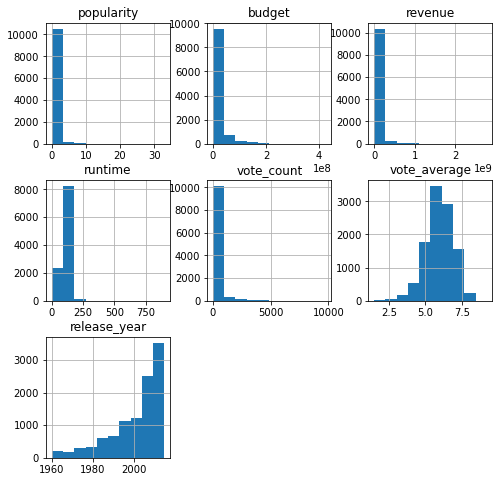

In [12]:
df.hist(figsize(8,8));

#### there are multiple 0's in revenue, budget, and runtime replace them with NAN

In [13]:
df['runtime'] =df['runtime'].replace(0, np.NAN)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10730 non-null  float64
 1   budget                10730 non-null  int64  
 2   revenue               10730 non-null  int64  
 3   original_title        10730 non-null  object 
 4   cast                  10730 non-null  object 
 5   director              10730 non-null  object 
 6   tagline               8002 non-null   object 
 7   keywords              9306 non-null   object 
 8   overview              10730 non-null  object 
 9   runtime               10703 non-null  float64
 10  genres                10730 non-null  object 
 11  production_companies  9773 non-null   object 
 12  release_date          10730 non-null  object 
 13  vote_count            10730 non-null  int64  
 14  vote_average          10730 non-null  float64
 15  release_year       

#### check for duplicates

In [14]:
df.duplicated().sum()

1

####  drop duplicates snce it's only 1

In [15]:
df = df.drop_duplicates(subset=None, keep="first", inplace=False)

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(10729, 16)

In [18]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10729.000000,1.072900e+04,1.072900e+04,10702.000000,10729.000000,10729.000000,10729.000000
mean,0.652693,1.480641e+07,4.032740e+07,102.737152,219.851151,5.964899,2001.257806
std,1.004881,3.106679e+07,1.176621e+08,30.080724,578.862518,0.930260,12.820656
min,0.000188,0.000000e+00,0.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,0.210766,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.387190,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000
75%,0.721427,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


#### Now we convert release_date to datetime format

In [19]:
df.release_date = pd.to_datetime(df['release_date'])

In [20]:
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [21]:
#checking if all the rows have proper datatypes
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [23]:
#checking unique values in genres
df.genres.str.get_dummies(',').stack().sum(level=1)

Action                                      63
Action|Adventure                            15
Action|Adventure|Animation                   4
Action|Adventure|Animation|Comedy|Drama      1
Action|Adventure|Animation|Comedy|Family     1
                                            ..
Western|Drama|Crime|Romance                  1
Western|History                              1
Western|History|War                          1
Western|Horror|Thriller                      1
Western|Thriller                             1
Length: 2022, dtype: int64

In [24]:
#check for unique values
df.nunique()

popularity              10682
budget                    553
revenue                  4698
original_title          10437
cast                    10663
director                 5016
tagline                  7958
keywords                 8748
overview                10715
runtime                   242
genres                   2022
production_companies     7406
release_date             5872
vote_count               1289
vote_average               70
release_year               56
dtype: int64

### Now our data is ready to work on 

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned the data, we're ready to move on to exploration. In this section we'll compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. 

### Research Question 1: What are the most common movie genres?

> First thing we notice how the genres column is pipe separated and when we tried to check for unique values in returned all genres at once so we need to separate them


In [25]:
#Concatenate strings in the Series/Index with given separator.
genre_c = pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts() 
genre_c

Drama              4746
Comedy             3774
Thriller           2902
Action             2376
Romance            1707
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               398
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
dtype: int64

#### Conclusion:

> Drama movies are the most common genre followed by comedy and Thriller, Tv movies and Western movies are the least common genres


<AxesSubplot:title={'center':'Most popular Genres'}, xlabel='Genre', ylabel='Number of Movies'>

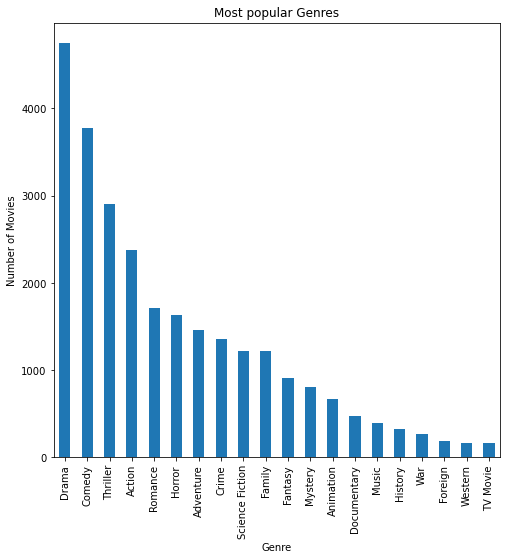

In [26]:
#get the visualization of this conclusion:
plot_genre = genre_c.plot.bar()
plot_genre.set(title = 'Most popular Genres')
plot_genre.set_xlabel('Genre')
plot_genre.set_ylabel('Number of Movies')
# Show the plot
plot_genre

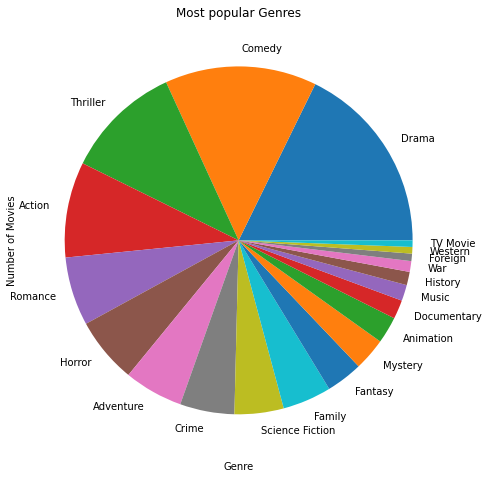

In [28]:
plotpie= genre_c.plot.pie()
plotpie.set(title = 'Most popular Genres')
plotpie.set_xlabel('Genre')
plotpie.set_ylabel('Number of Movies')
plt.show()

### Research Question 2: Who are the most cast actors?

> Notice that the cast column is separated the same way as the genres column so it's basically the same process

In [84]:
cast_count = pd.Series(df['cast'].str.cat(sep = '|').split('|')).value_counts() 
cast_count

Robert De Niro          72
Samuel L. Jackson       71
Bruce Willis            62
Nicolas Cage            61
Michael Caine           53
                        ..
Hannah Hart              1
Nirattisai Kaljaruek     1
Maia Brewton             1
Charlie McDermott        1
Sam Louwyck              1
Length: 18924, dtype: int64

#### conclusion:

> Robert De Niro is the most cast actor with 72 movies followed by Samuel L. Jackson with 71 movies, Bruce Willis comes third with 62 movies...
Now we find the most common genre for each of these actors as well as the average rate for the movies they appeared in 

> Here we can get the top 10 actors based on number of appearances in movies:

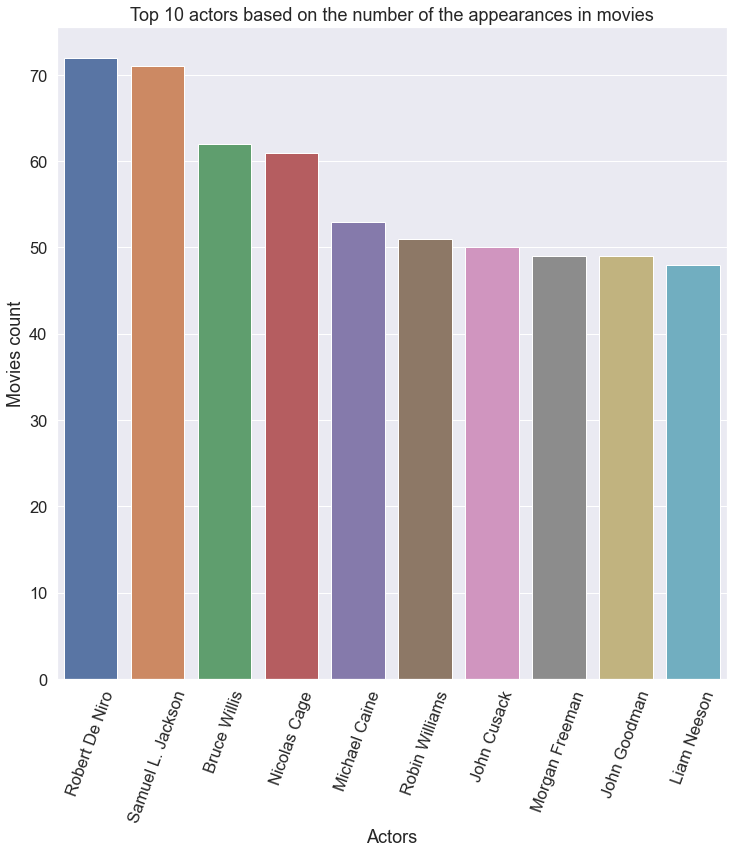

In [90]:
cast_count = cast_count[:10,]
ax = sns.barplot(x= cast_count.index, y= cast_count.values)
sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.5)
ax.set(xlabel='Actors', ylabel='Movies count', title = 'Top 10 actors based on the number of the appearances in movies')

def rotate_x():
    #rotate x-axis' text
    for item in ax.get_xticklabels():
        item.set_rotation(70)

rotate_x()
    

plt.show()

#### Conclusion:
> Top 3 actors based on movie appearance are Robert De Niro, Samuel L.Jackson and Bruce Willis, we can now see a detailed visualization of the movies of the most popular actor

##### visualization of Robert De Niro movies:

<AxesSubplot:title={'center':'Robert De Niro movie popularity chart'}, ylabel='Frequency'>

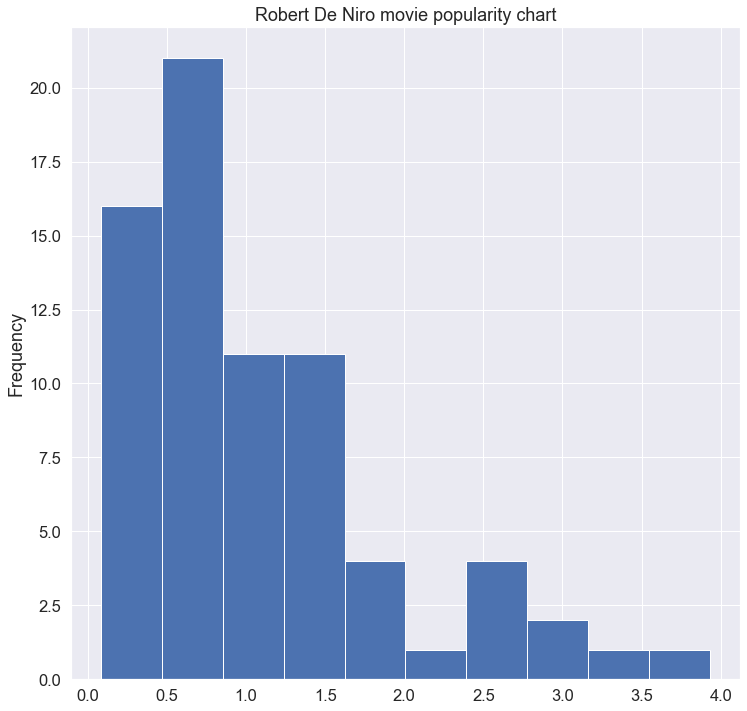

In [34]:
filter1 = df[df['cast'].str.contains('Robert De Niro')]
filter1.popularity.plot(kind="hist", title="Robert De Niro movie popularity chart")

<AxesSubplot:title={'center':'Robert De Niro movies rating chart'}>

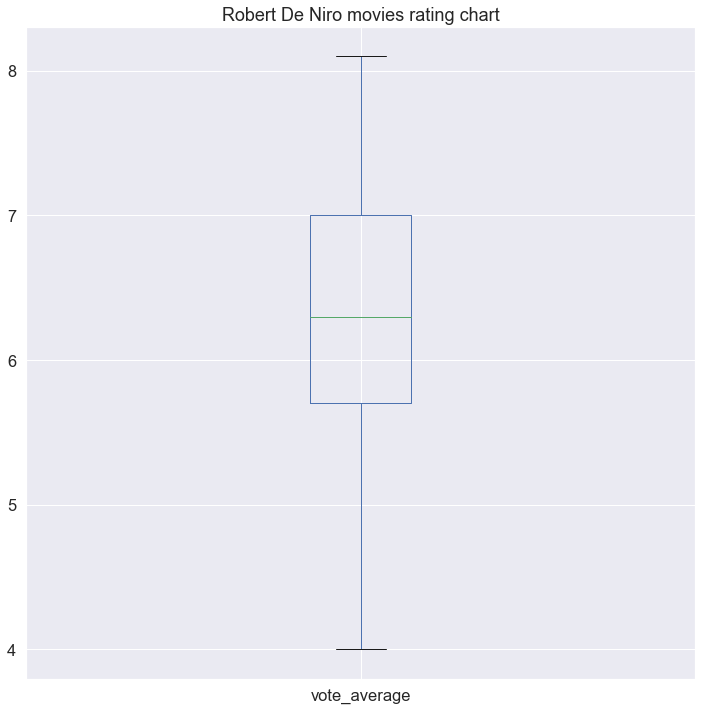

In [35]:
filter1.vote_average.plot(kind="box", title="Robert De Niro movies rating chart" )

In [36]:
filter1.vote_average.mean()

6.330555555555555

In [37]:
filter1.runtime.mean()

114.98611111111111

#### Conclusion:
> from the previous examples we find that the average runtime of the most popular actor movies is 115 minutes, average rating is 6.33 and the popularity seems over 12

### Research Question 3:  What production company produces the most movies?

In [87]:
#split companies
companies_count = pd.Series(df['production_companies'].str.cat(sep = '|').split('|')).value_counts() 
companies_count


Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
                                         ... 
Keystone Pictures                           1
RÃ©gion des Pays-de-la-Loire                1
Make A Move                                 1
Starboard Entertainment                     1
Zero Film GmbH                              1
Length: 7842, dtype: int64

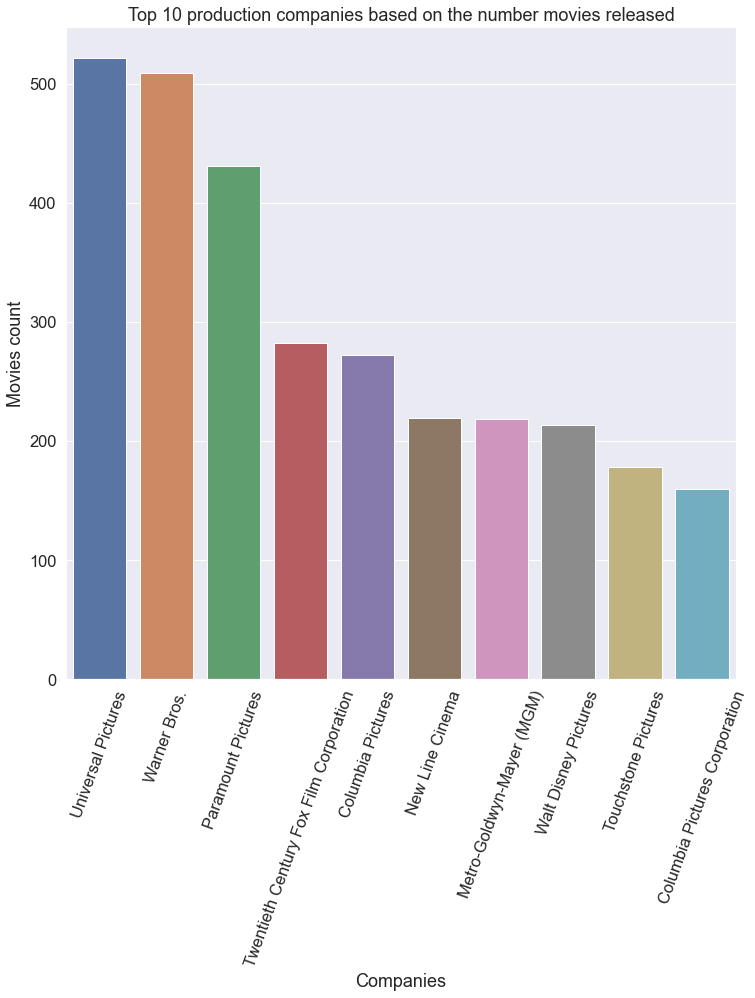

In [91]:
# plot 
companies_count = companies_count[:10,]
ax = sns.barplot(x= companies_count.index, y= companies_count.values)
sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.5)
ax.set(xlabel='Companies', ylabel='Movies count', title = 'Top 10 production companies based on the number movies released')

#rotate x-axis' text
rotate_x()
    

plt.show()

#### Conclusion:
    Universal Pictures is the company that produces most movies followed by Warner Bros. in 2nd place and Paramount pictures in 3rd

### Research Question 4: What are the top movies in terms of profit?

#### First we look at the top movies based on revenue and budget:

In [40]:
movies_revenue = df[['original_title','revenue']]
movies_budget= df[['original_title','budget']]
movies_revenue.sort_values(by="revenue", ascending=False).head(10)


,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


In [41]:
movies_budget.sort_values(by="budget", ascending=False).head(10)

,original_title,budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000
1929,Tangled,260000000
4411,John Carter,260000000
7394,Spider-Man 3,258000000
5508,The Lone Ranger,255000000
634,The Hobbit: The Battle of the Five Armies,250000000


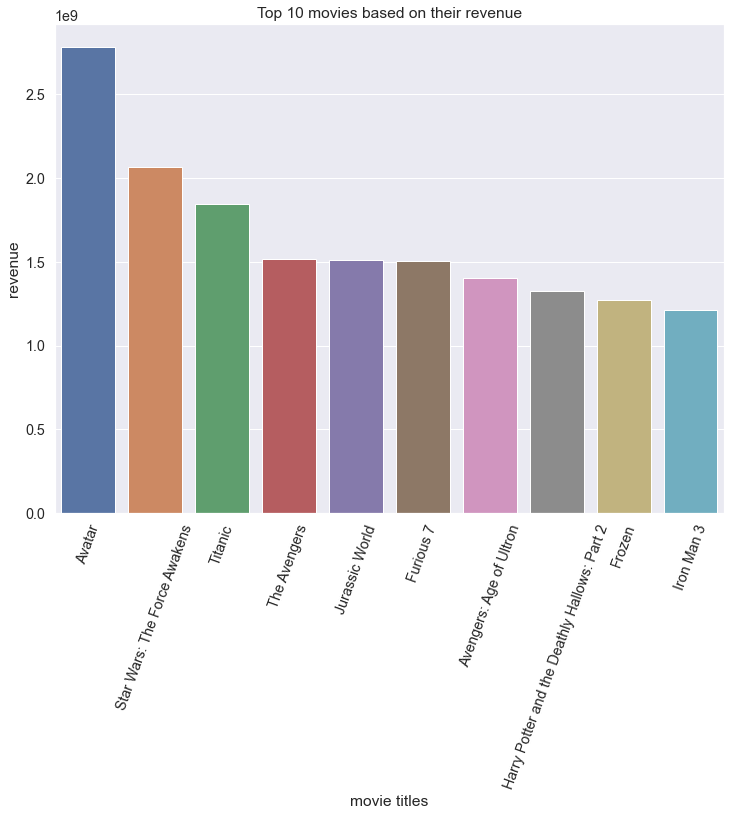

In [92]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)


ax = sns.barplot(
    movies_revenue.sort_values(by = "revenue", ascending=False).head(10).original_title, 
    movies_revenue.sort_values(by = "revenue", ascending=False).head(10).revenue)



#rotate x-axis' text
rotate_x()
    

ax.set(xlabel='movie titles', ylabel='revenue', title = 'Top 10 movies based on their revenue')
plt.show()

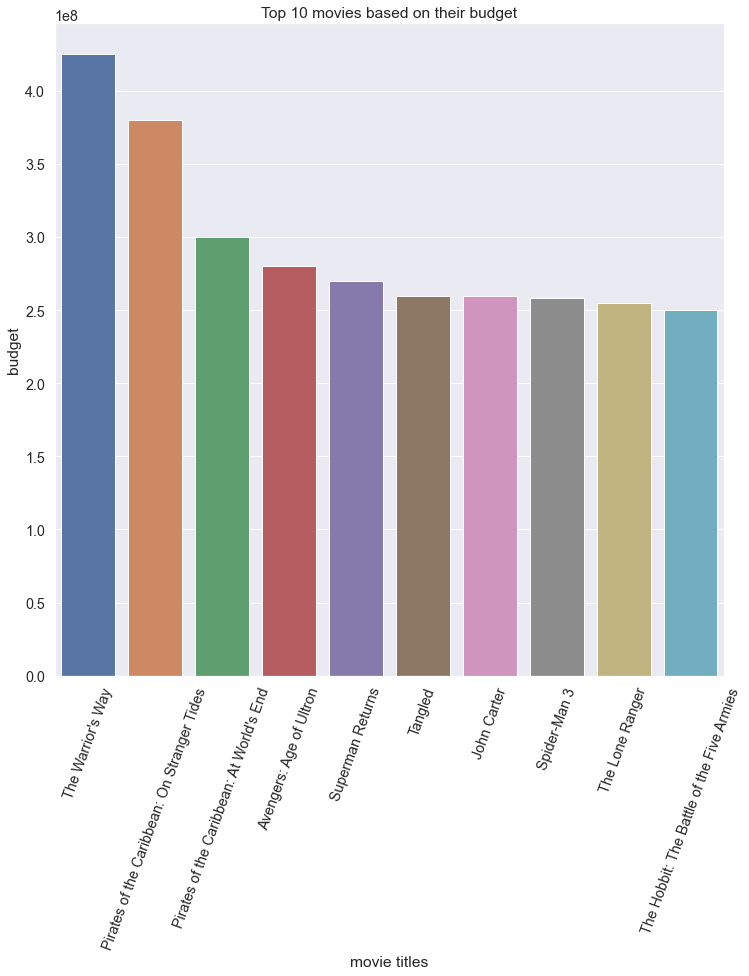

In [93]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.3)


ax = sns.barplot(
    movies_budget.sort_values(by = "budget", ascending=False).head(10).original_title, 
    movies_budget.sort_values(by = "budget", ascending=False).head(10).budget)



#rotate x-axis' text
rotate_x()

ax.set(xlabel='movie titles', ylabel='budget', title = 'Top 10 movies based on their budget')
plt.show()

#### Add new column called profit
> This column gets the profit of each movie (revenue - budget) to measure how profitable the movies were and base success on this 

In [44]:
#Add new column
df.insert(3, "profit" ,df['revenue']-df['budget'])
df.head()

,popularity,budget,revenue,profit,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [45]:
movies_profit= df[['original_title','profit']]
movies_profit.sort_values(by="profit", ascending=False).head(10)

,original_title,profit
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
4361,The Avengers,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822
14,Avengers: Age of Ultron,1125035767
5422,Frozen,1124219009
8094,The Net,1084279658


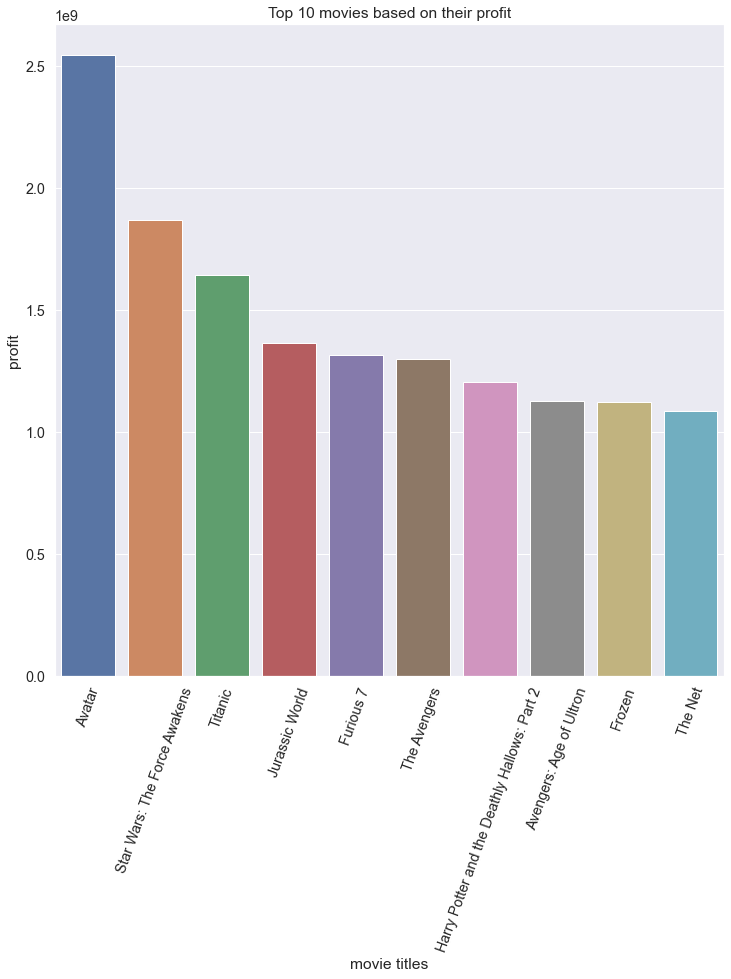

In [94]:
#draw conclusion
#To avoid errors
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.3)


ax = sns.barplot(
    movies_profit.sort_values(by = "profit", ascending=False).head(10).original_title, 
    movies_profit.sort_values(by = "profit", ascending=False).head(10).profit)



#rotate x-axis' text
rotate_x()

ax.set(xlabel='movie titles', ylabel='profit', title = 'Top 10 movies based on their profit')
plt.show()

#### Conclusion:
> 1. Avatar is the most successul movie based on profit, followed by Star Wars and Titanic in 3rd
2. The movies with the most revenue weren't necessarily the most profitable and the movies with the most budget weren't necessarily the most profitable 

### Research Question 5: What are the top movies based on popularity?

In [47]:
high1 = df.nlargest(10, ['popularity'])
high1

,popularity,budget,revenue,profit,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
629,24.949134,165000000,621752480,456752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Mankind was born on Earth. It was never meant ...,saving the world|artificial intelligence|fathe...,Interstellar chronicles the adventures of a gr...,169.0,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014
630,14.311205,170000000,773312399,603312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,All heroes start somewhere.,marvel comic|spaceship|space|scene during end ...,"Light years from Earth, 26 years after being a...",121.0,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
631,12.971027,170000000,714766572,544766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,In heroes we trust.,washington d.c.|future|shield|marvel comic|comic,After the cataclysmic events in New York with ...,136.0,Action|Adventure|Science Fiction,Marvel Studios,2014-03-20,3848,7.6,2014
1329,12.037933,11000000,775398007,764398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,"A long time ago in a galaxy far, far away...",android|galaxy|hermit|death star|lightsaber,Princess Leia is captured and held hostage by ...,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977
632,11.422751,20000000,78739897,58739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,Don't set him off.,hitman|revenge|murder|gangster|dog,"After the sudden death of his beloved wife, Jo...",101.0,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2014-10-22,2712,7.0,2014
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
633,10.739009,125000000,752100229,627100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,Fire burns brighter in the darkness,resistance|post-apocalyptic|dystopia|war|sequel,Katniss Everdeen reluctantly becomes the symbo...,123.0,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,2014-11-18,3590,6.6,2014


> These are the top 10 movies based on popularity, let's examine their budget and see if it's higher that average or not

In [48]:
#average budget:
df['budget'].mean()

14806405.70155653

In [49]:
# how many of the most popular movies are above average budget?
high1.query('budget > 102.3')

,popularity,budget,revenue,profit,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
629,24.949134,165000000,621752480,456752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Mankind was born on Earth. It was never meant ...,saving the world|artificial intelligence|fathe...,Interstellar chronicles the adventures of a gr...,169.0,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014
630,14.311205,170000000,773312399,603312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,All heroes start somewhere.,marvel comic|spaceship|space|scene during end ...,"Light years from Earth, 26 years after being a...",121.0,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
631,12.971027,170000000,714766572,544766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,In heroes we trust.,washington d.c.|future|shield|marvel comic|comic,After the cataclysmic events in New York with ...,136.0,Action|Adventure|Science Fiction,Marvel Studios,2014-03-20,3848,7.6,2014
1329,12.037933,11000000,775398007,764398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,"A long time ago in a galaxy far, far away...",android|galaxy|hermit|death star|lightsaber,Princess Leia is captured and held hostage by ...,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977
632,11.422751,20000000,78739897,58739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,Don't set him off.,hitman|revenge|murder|gangster|dog,"After the sudden death of his beloved wife, Jo...",101.0,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2014-10-22,2712,7.0,2014
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
633,10.739009,125000000,752100229,627100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,Fire burns brighter in the darkness,resistance|post-apocalyptic|dystopia|war|sequel,Katniss Everdeen reluctantly becomes the symbo...,123.0,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,2014-11-18,3590,6.6,2014


In [50]:
#How many of these movies are below average budget?
high1.query('budget < 102.3')

,popularity,budget,revenue,profit,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


#### Conclusion:
most popular movies tend to have a big budget 

### Research Question 6: What are the top movies based on viewer rating?

In [51]:
high = df.nlargest(10,['vote_average'])
high

,popularity,budget,revenue,profit,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3894,0.006925,0,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,NaN,cinema|nouvelle vague|hindi cinema|cinema novo...,"The Story of Film: An Odyssey, written and dir...",900.0,Documentary,NaN,2011-09-03,14,9.2,2011
1200,0.129531,0,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,NaN,artificial intelligence|confession|technology|...,This feature-length special consists of three ...,74.0,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,2014-12-16,41,8.8,2014
6911,0.212010,0,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,NaN,live concert,Pulse (stylized as Pâ€¢Uâ€¢Lâ€¢Sâ€¢E) is a Pin...,145.0,Music,SMV Enterprises|Columbia Music Video|EMI,2006-07-09,23,8.7,2006
3690,0.321341,0,0,0,The Art of Flight,Travis Rice|Nicolas Muller|Mark Landvik|Jake B...,Curt Morgan,NaN,sport|snowboard,A new breed of action sports film comes to lif...,80.0,Adventure|Documentary,Red Bull Media House|Brain Farm Digital Cinema,2011-09-08,60,8.5,2011
8221,0.194889,0,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Brian De Palma|Gregory Peck|Fr...,Martin Scorsese|Michael Henry Wilson,NaN,NaN,Martin Scorsese celebrates American movies fro...,225.0,Documentary,Miramax Films|British Film Institute (BFI),1995-05-21,11,8.5,1995
8411,0.302908,0,0,0,Queen - Rock Montreal,Freddie Mercury|Roger Taylor|John Deacon|Brian...,Saul Swimmer,NaN,live concert,The only Queen concert ever filmed in its enti...,138.0,Music,Edel records GmbH,1981-11-24,14,8.5,1981
8839,0.157001,0,0,0,Dave Chappelle: Killin' Them Softly,Dave Chappelle,Stan Lathan,NaN,stand-up|stand up comedy,Dave Chappelle returns for a stand-up to D.C. ...,57.0,Comedy,NaN,2000-01-01,17,8.5,2000
609,0.033378,0,0,0,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,Andrew Jarecki,Four Decades. Three Murders. And One Very Rich...,murder|crime|real life,"Robert Durst, scion of one of New Yorkâ€™s bil...",240.0,Documentary,Blumhouse Productions|Hit the Ground Running F...,2015-02-08,72,8.4,2015
2334,0.145026,0,0,0,Rush: Beyond the Lighted Stage,Sebastian Bach|Jack Black|Jimmy Chamberlin|Ged...,Sam Dunn|Scot McFadyen,The band you know. The story you don't.,literature|interview|biography|live performanc...,An in-depth look at the Canadian rock band Rus...,107.0,Documentary|Music,NaN,2010-06-29,14,8.4,2010
4178,7.192039,25000000,28341469,3341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Fear can hold you prisoner. Hope can set you f...,prison|corruption|police brutality|prison cell...,Framed in the 1940s for the double murder of h...,142.0,Drama|Crime,Castle Rock Entertainment,1994-09-10,5754,8.4,1994


> These are the top 10 movies based on viewer rating
notice if we try to get the average budget by mean it wouldn't give us an accurate value because there's a movie that's 900 minutes of runtime so we use median instead 

##### Average runtime of the highest rated movies:

In [52]:
high['runtime'].median()

140.0

#### Conclusion:
> Average runtime of the highest rated movies is 140 minutes

### Research Question 7: What are the most common keywords?

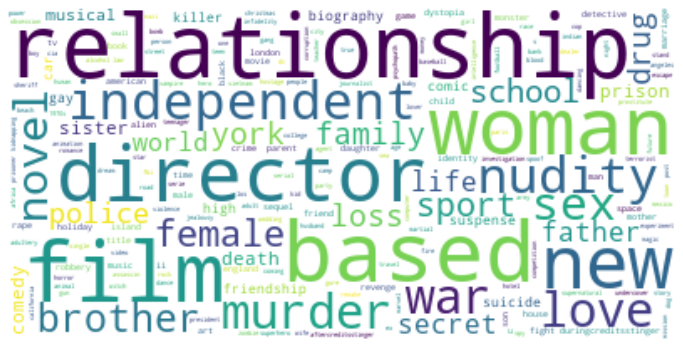

In [53]:
#Creating the text variable
text = " ".join(df['keywords'].str.cat(sep = '|').split('|'))
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

> Here we have a figure of the most common keywords in the movie dataset 

### Research Question 8: what is the best month to release a movie?

> Best month to release a movie can be decided by the highest revenue

In [54]:
#first create a column called month and store months in it
df['month'] = df['release_date'].apply(lambda x: x.month)
df.head()

,popularity,budget,revenue,profit,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,month
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,6
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,5
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,3
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,12
4,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,4


In [55]:
monthly_revenue = df.groupby('month')['revenue'].sum()
monthly_revenue

month
1     12968479332
2     19793785507
3     31393443375
4     26392671428
5     50454865815
6     61660585217
7     45337825481
8     25477766900
9     25731466985
10    29353709677
11    45896250786
12    58211863204
Name: revenue, dtype: int64

Text(0.5, 1.0, 'Revenue by Month released')

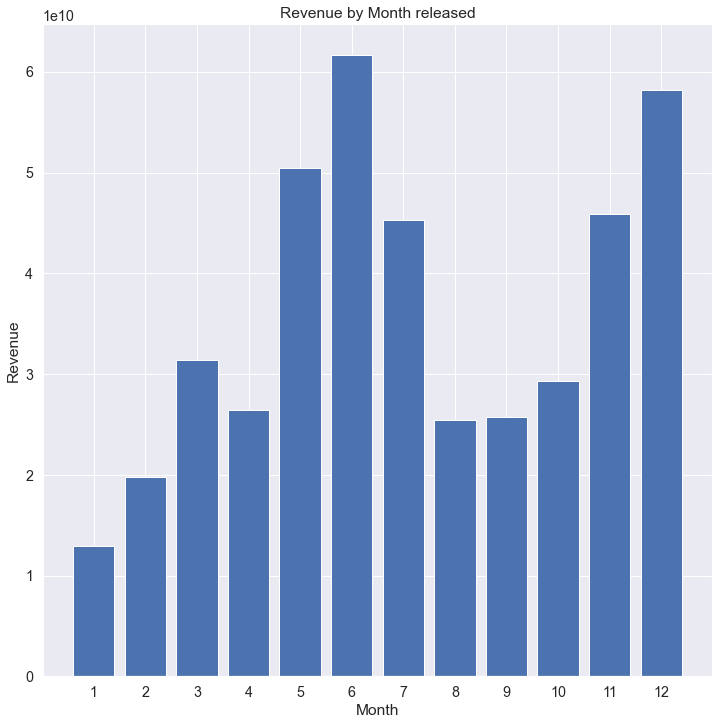

In [56]:
from importlib import reload
plt=reload(plt)
#Now we plot the results
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], monthly_revenue, tick_label =[1,2,3,4,5,6,7,8,9,10,11,12])
# title and labels
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.title('Revenue by Month released')



#### Conclusion:
> June is the most profitable month followed by November and December

### Research question 9: Is the budget related to a higher average vote?

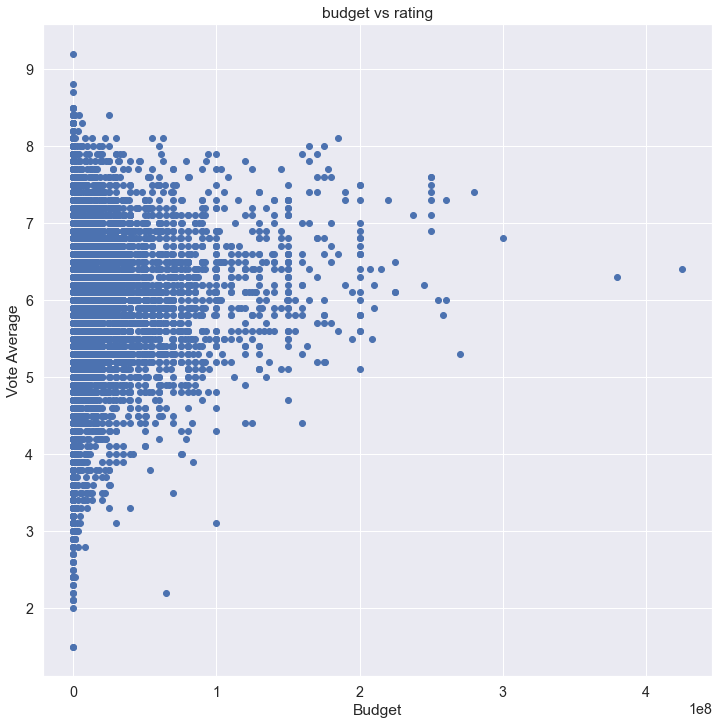

In [57]:
from importlib import reload
plt=reload(plt)
plt.scatter(x=df['budget'], y=df['vote_average'])
plt.title("budget vs rating")
plt.xlabel("Budget")
plt.ylabel('Vote Average')
plt.show()

#### Conlusions:
> From this scatter plot we can see that a higher budget does have a correlation with a higher rate, but many highest rated movies have lower budgets

### Research Question 10: what's the correlation between runtime and vote average, budget and popularity?

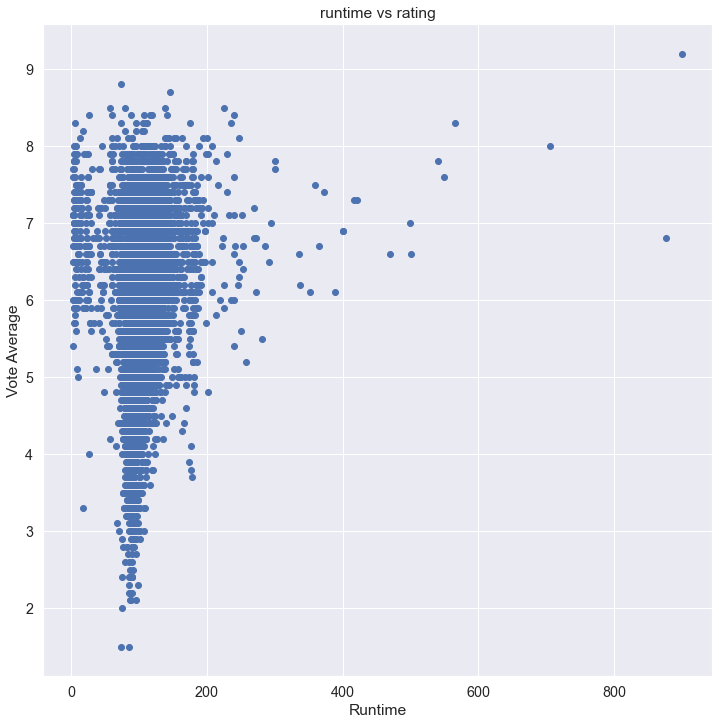

In [58]:
plt.scatter(x=df['runtime'], y=df['vote_average'])
plt.title("runtime vs rating")
plt.xlabel("Runtime")
plt.ylabel('Vote Average')
plt.show()

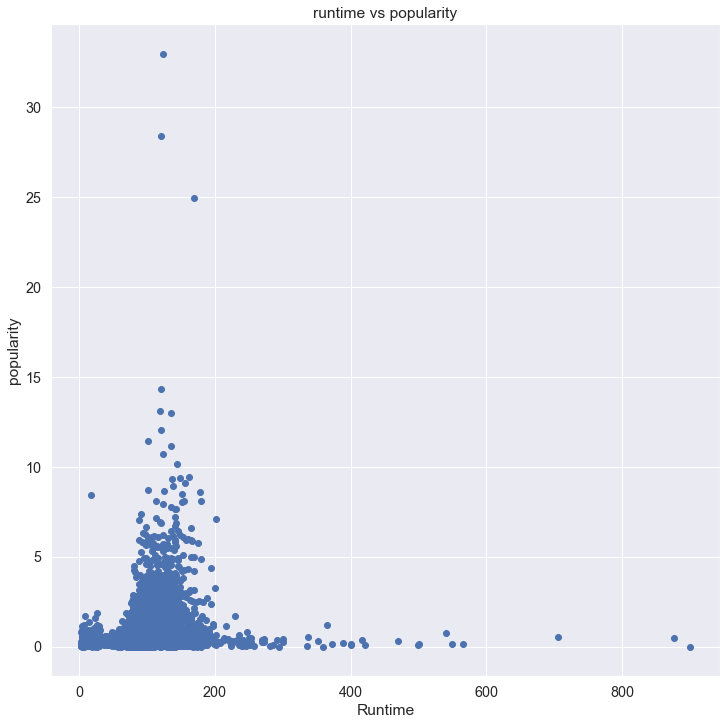

In [59]:
plt.scatter(x=df['runtime'], y=df['popularity'])
plt.title("runtime vs popularity")
plt.xlabel("Runtime")
plt.ylabel('popularity')
plt.show()

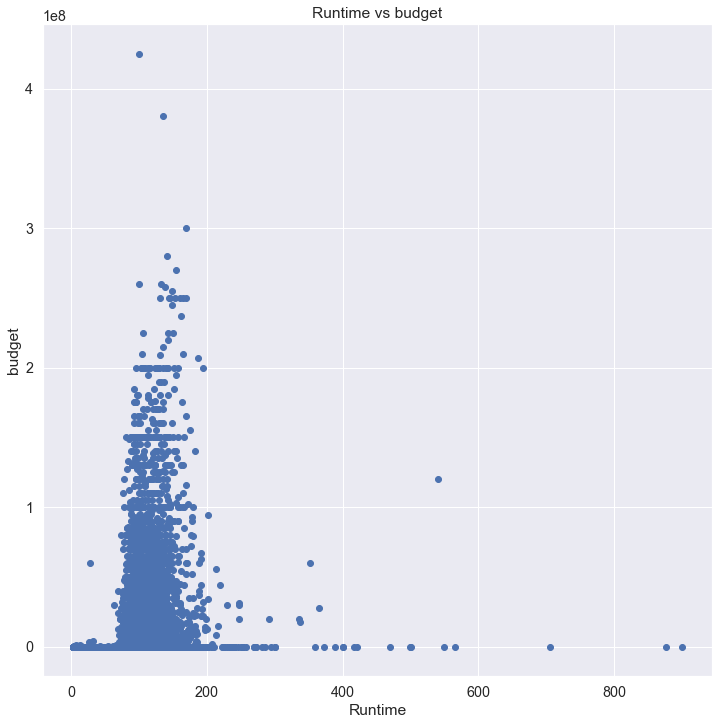

In [60]:
plt.scatter(x=df['runtime'], y=df['budget'])
plt.title("Runtime vs budget")
plt.xlabel("Runtime")
plt.ylabel('budget')
plt.show()

#### Conclusion: 
> 1. The higher the runtime, the bigger the budget gets
2. Movies shorter than 200 minutes are way more popular than movies longer than 200 minutes
3. There isn't a big correlation between rating and runtime. however, longer movies have higher ratings 

### Research Question 11: Who are the most successful directors?
    Most successful director is the one who generated the most revenue

In [61]:
dir_rev = df.groupby(['director']).sum()['revenue'].nlargest(10)
dir_rev

director
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
David Yates          4154295625
Robert Zemeckis      3869690869
Chris Columbus       3851491668
Tim Burton           3665414624
Ridley Scott         3649996480
Name: revenue, dtype: int64

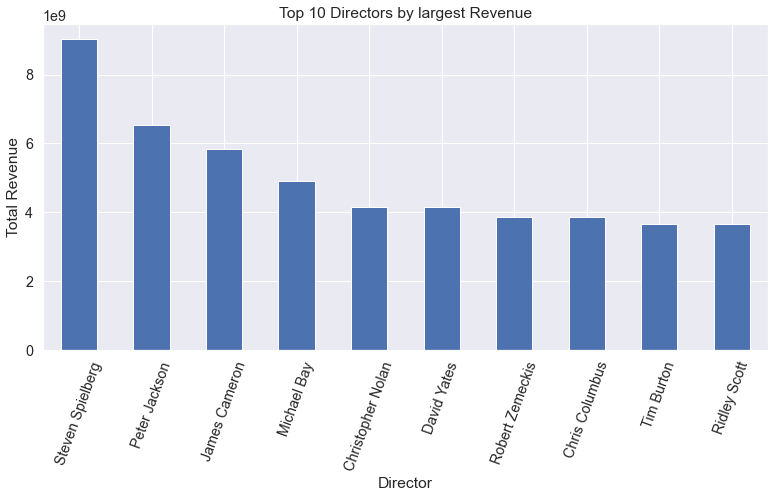

In [62]:
dir_rev.plot(kind = 'bar', figsize=(13,6))
plt.title("Top 10 Directors by largest Revenue")
plt.xticks(rotation=70)
plt.xlabel("Director")
plt.ylabel("Total Revenue")
plt.show()

#### Conclusion: 
> 1. Steven Spielberg is the most successful director in terms of revenue 
2. he's followed by Peter Jackson, while James Cameron comes 3rd

### Research Question 12: How did the runtime of movies change over the years? What Movie has the longest runtime? what movie has the shortest runtime? what's the average movie runtime?

#### Average movie runtime:


In [63]:
df['runtime'].mean()

102.7371519342179

#### Longest movie: 

In [64]:
df.loc[df['runtime'].idxmax()]

popularity                                                       0.006925
budget                                                                  0
revenue                                                                 0
profit                                                                  0
original_title                              The Story of Film: An Odyssey
cast                    Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director                                                     Mark Cousins
tagline                                                               NaN
keywords                cinema|nouvelle vague|hindi cinema|cinema novo...
overview                The Story of Film: An Odyssey, written and dir...
runtime                                                             900.0
genres                                                        Documentary
production_companies                                                  NaN
release_date                          

#### Shortest movie:

In [65]:
df.loc[df['runtime'].idxmin()]

popularity                                                       0.202776
budget                                                                  0
revenue                                                                 0
profit                                                                  0
original_title                                       Batman: Strange Days
cast                                Kevin Conroy|Brian George|Tara Strong
director                                                       Bruce Timm
tagline                                                               NaN
keywords                dc comics|superhero|based on comic book|noir|p...
overview                Celebrating Batmanâ€™s 75th anniversary, DC En...
runtime                                                               3.0
genres                                                   Action|Animation
production_companies                                            DC Comics
release_date                          

#### Runtime visualization:

(array([1.230e+02, 5.800e+01, 4.600e+01, 1.870e+02, 2.992e+03, 4.460e+03,
        1.853e+03, 5.990e+02, 1.600e+02, 1.110e+02, 4.300e+01, 1.300e+01,
        1.100e+01, 1.500e+01, 3.000e+00, 4.000e+00, 4.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([  3.  ,  20.94,  38.88,  56.82,  74.76,  92.7 , 110.64, 128.58,
        146.52, 164.46, 182.4 , 200.34, 218.28, 236.22, 254.16, 272.1 ,
        290.04, 307.98, 325.92, 343.86, 361.8 , 379.74, 397.68, 415.62,
        433.56, 451.5 , 469.44, 487.38, 505.32, 523.26, 541.2 , 559.14,
        577.08, 595.02, 612.96, 630.9 , 648.84, 666.78, 684.72, 702.66,
        720.6 , 

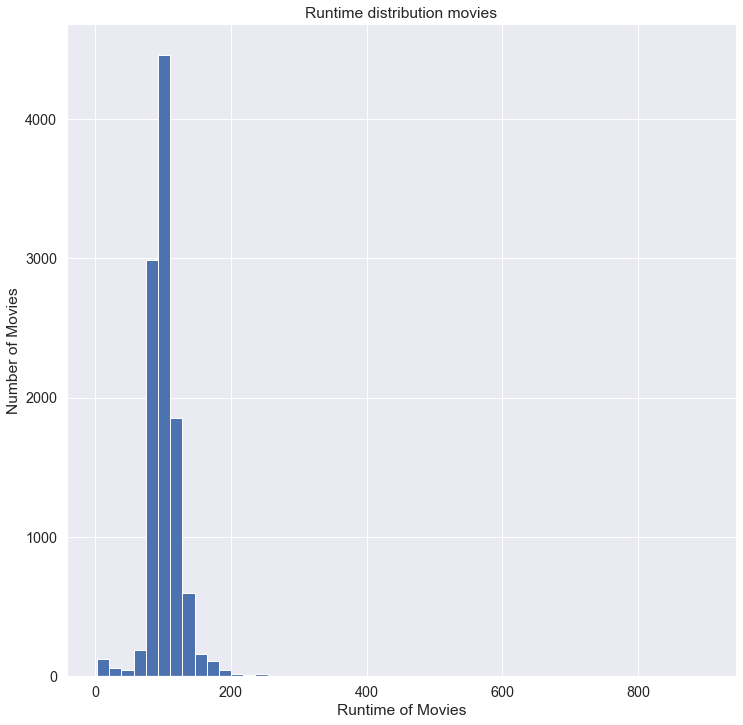

In [66]:
# x-axis
plt.xlabel('Runtime of Movies')
# y-axis
plt.ylabel('Number of Movies')
# Title of the histogram
plt.title('Runtime distribution movies')
# Plot a histogram
plt.hist(df['runtime'], bins = 50)

#### Change of runtime over the years:

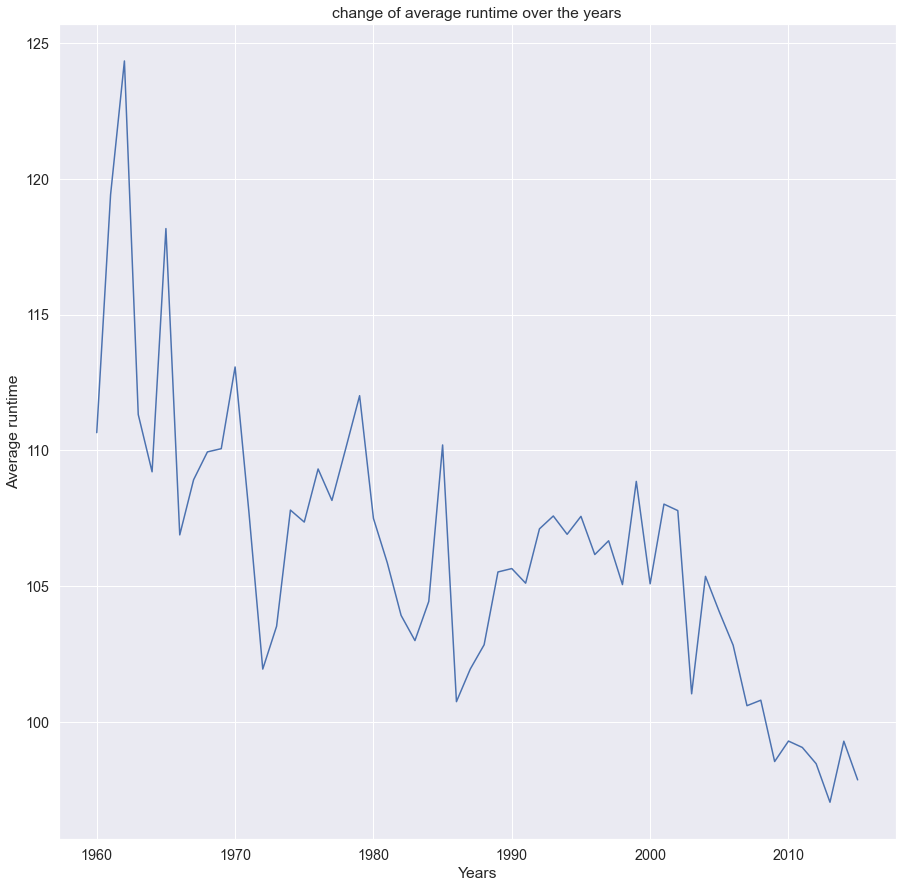

In [67]:
year_runtime = df['runtime'].groupby(df['release_year']).describe()
average_runtime = year_runtime['mean']
f, axs = plt.subplots(figsize=(15,15))
axs.plot(average_runtime)
axs.set_title("change of average runtime over the years")
axs.set_xlabel("Years")
axs.set_ylabel("Average runtime")
plt.show()

#### Conclusion:
> 1. The longest movie is "The Story of Film: An Odyssey" and its runtime is 900 minutes
2. The shortest movie is "Batman: Strange Days" and its runtime is : 3 minutes
3. The Average movie runtime is 102 minutes
4. The majority of movies tend to be between 40 to 200 minutes
5. Average runtime got slightly shorter over the years

<a id='conclusions'></a>
## Conclusions
    1. Most cast actor is Robert De Niro, even though the average vote count of his movies isn't as high as I would have imagined
    2. if a certain company wants to release a movie they better do it in June, October or December, festive seasons tend to get the highest revenue
    3. relationship, woman, sex, independent seem to be the most common keywords people look for when searching for movies
    4. average runtime of the highest rated movies is 140 minutes which means that most movies that are slightly under/over 2 hours are popular
    5. Usually, the bigger the bidget the more popularity
    6. longer movies have higher budget
    7. The absolute longest movies takes the lion share of high ratings
    8. Highest profitable movies tend to have the most revenue but not necessarily the most budget
    9. The Average movie runtime is 102 minutes
   ### Data limitations:
   1. we can't get overrated and underrated movies based on this data since we only have viewer rating and not critics rating
   2. Viewer count varies significantly from some movies to others so viewer rating shouldn't be an indicator of how good the movie actually is since the movies with lower viewer count will have higher rating compared to the movies that were watched by the majority of people 
   3. some movies are below 40 minutes and should be considered short movies so they might have messed up the data a bit 
   4. while Robert Di Nero is the most cast actor some of his roles are small and he's been active since a ong time which skewed the results in his favor, the data should have had years acive for example
   5. the value of money changed over the years so we should take that into consideration when we look at movies with the biggeset revenue